In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

In [40]:
df=pd.read_excel("C:/Users/hp/Desktop/PFA_BCM/dataframe.xlsx")
df.head()

,Year,Inflation,Investment,Avoirs_Exterieurs_en_millions_mro,Taux_de_change_mensuel_en_dollar,Australie,Canada,Chine,Espagne,France,Italie,Japon,Mauritanie,Exportations_en_millions_mro,M2_en_millions_mro
0,1992,10.141818,0.348815,7484,190.0,0.427678,0.247550,3.257417,0.141241,0.051179,0.048388,0.026117,1.874126,53369.858,26904
1,1993,9.370344,0.871081,5567,191.0,4.045157,0.738843,3.179374,-0.156787,-0.020117,-0.049463,-0.013317,5.873637,58919.858,27172
2,1994,4.128259,0.106933,3943,192.0,3.979706,1.249346,2.985429,0.362246,0.075469,0.124759,0.031418,-3.060732,59775.858,30850
3,1995,6.543791,0.334144,7248,193.0,3.883165,0.745687,2.508456,0.419139,0.067412,0.167437,0.076299,9.819800,64622.858,29302
4,1996,4.681306,-0.020428,8357,196.0,3.863934,0.469531,2.272265,0.404405,0.045216,0.073474,0.090882,5.818827,67257.858,34264


In [41]:
df.shape

(32, 15)

In [42]:
df2=pd.read_excel("C:/Users/hp/Desktop/PFA_BCM/generale_mauritania_data.xlsx")
df2.head()

,Year,Inflation,exportations_fer_m_mro,Investment,Avoirs_Exterieurs_en_millions_mro,Taux_de_change_mensuel_en_dollar,exportation_pêche,Australie,Canada,Chine,Espagne,France,Italie,Japon,Mauritanie,expor_Pétrole,expor_Cuivre,expor_Or
0,1992,10.141818,14319,0.348815,7484,190,39050.858,0.427678,0.247550,3.257417,0.141241,0.051179,0.048388,0.026117,1.874126,0,0,0
1,1993,9.370344,19869,0.871081,5567,191,39050.858,4.045157,0.738843,3.179374,-0.156787,-0.020117,-0.049463,-0.013317,5.873637,0,0,0
2,1994,4.128259,20725,0.106933,3943,192,39050.858,3.979706,1.249346,2.985429,0.362246,0.075469,0.124759,0.031418,-3.060732,0,0,0
3,1995,6.543791,25572,0.334144,7248,193,39050.858,3.883165,0.745687,2.508456,0.419139,0.067412,0.167437,0.076299,9.819800,0,0,0
4,1996,4.681306,28207,-0.020428,8357,196,39050.858,3.863934,0.469531,2.272265,0.404405,0.045216,0.073474,0.090882,5.818827,0,0,0


In [20]:
df2.columns

Index(['Year', 'Inflation', 'exportations_fer_m_mro', 'Investment',
       'Avoirs_Exterieurs_en_millions_mro', 'Taux_de_change_mensuel_en_dollar',
       'exportation_pêche', 'Australie', 'Canada', 'Chine', 'Espagne',
       'France', 'Italie', 'Japon', 'Mauritanie', 'expor_Pétrole',
       'expor_Cuivre ', 'expor_Or'],
      dtype='object')

# Analyse univariée
## Visualisation de la distribution des variables

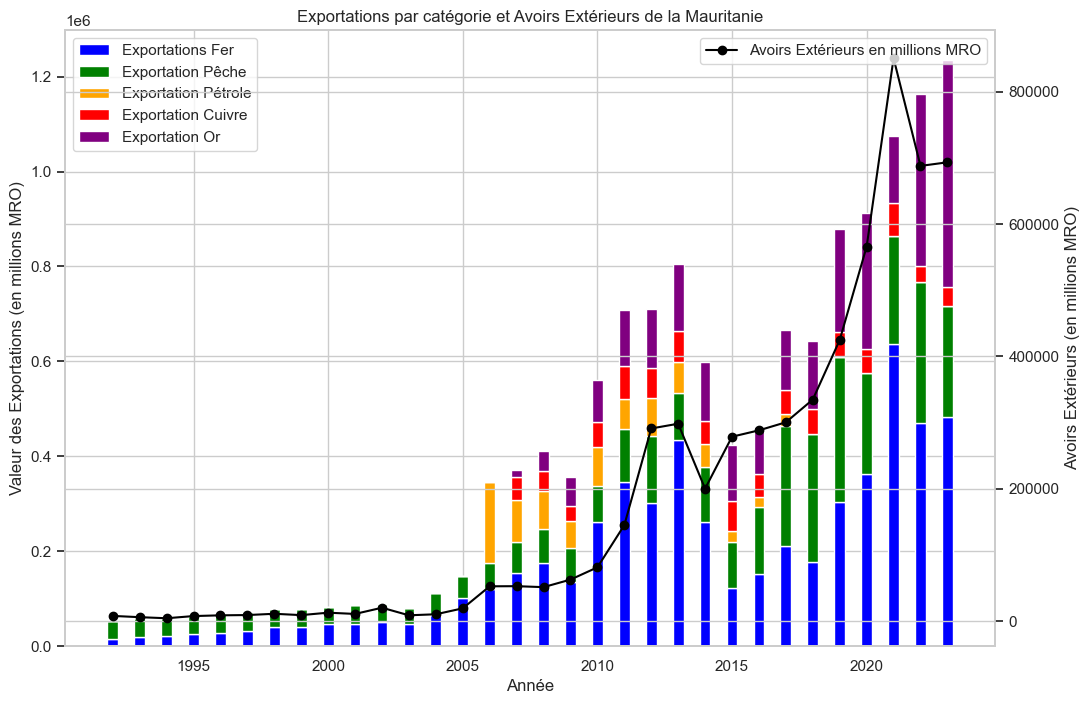

In [43]:
# Initialisation de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Tracer les histogrammes des différentes exportations
ax1.bar(df2['Year'], df2['exportations_fer_m_mro'], width=0.4, label='Exportations Fer', color='blue')
ax1.bar(df2['Year'], df2['exportation_pêche'], width=0.4, label='Exportation Pêche', color='green', bottom=df2['exportations_fer_m_mro'])
ax1.bar(df2['Year'], df2['expor_Pétrole'], width=0.4, label='Exportation Pétrole', color='orange', bottom=df2['exportations_fer_m_mro']+df2['exportation_pêche'])
ax1.bar(df2['Year'], df2['expor_Cuivre '], width=0.4, label='Exportation Cuivre', color='red', bottom=df2['exportations_fer_m_mro']+df2['exportation_pêche']+df2['expor_Pétrole'])
ax1.bar(df2['Year'], df2['expor_Or'], width=0.4, label='Exportation Or', color='purple', bottom=df2['exportations_fer_m_mro']+df2['exportation_pêche']+df2['expor_Pétrole']+df2['expor_Cuivre '])

# Nommer l'axe y de gauche pour les exportations
ax1.set_ylabel('Valeur des Exportations (en millions MRO)')
ax1.set_xlabel('Année')
ax1.legend(loc='upper left')

# Création d'un second axe y pour les Avoirs Extérieurs
ax2 = ax1.twinx()
ax2.plot(df2['Year'], df2['Avoirs_Exterieurs_en_millions_mro'], color='black', marker='o', linestyle='-', label='Avoirs Extérieurs en millions MRO')

# Nommer l'axe y de droite pour les Avoirs Extérieurs
ax2.set_ylabel('Avoirs Extérieurs (en millions MRO)')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.title("Exportations par catégorie et Avoirs Extérieurs de la Mauritanie")
plt.show()


 Le graphique en haut à gauche montre l’évolution de l’inflation de 1992 à 2022. On
 observe une grande volatilité, surtout au début de la période. Les années 2000 semblent
 marquer une stabilisation relative avec une baisse progressive jusqu’en 2015, suivie
 d’une remontée. Cette tendance pourrait être liée à diverses politiques économiques
 et événements nationaux ou internationaux influençant les prix.

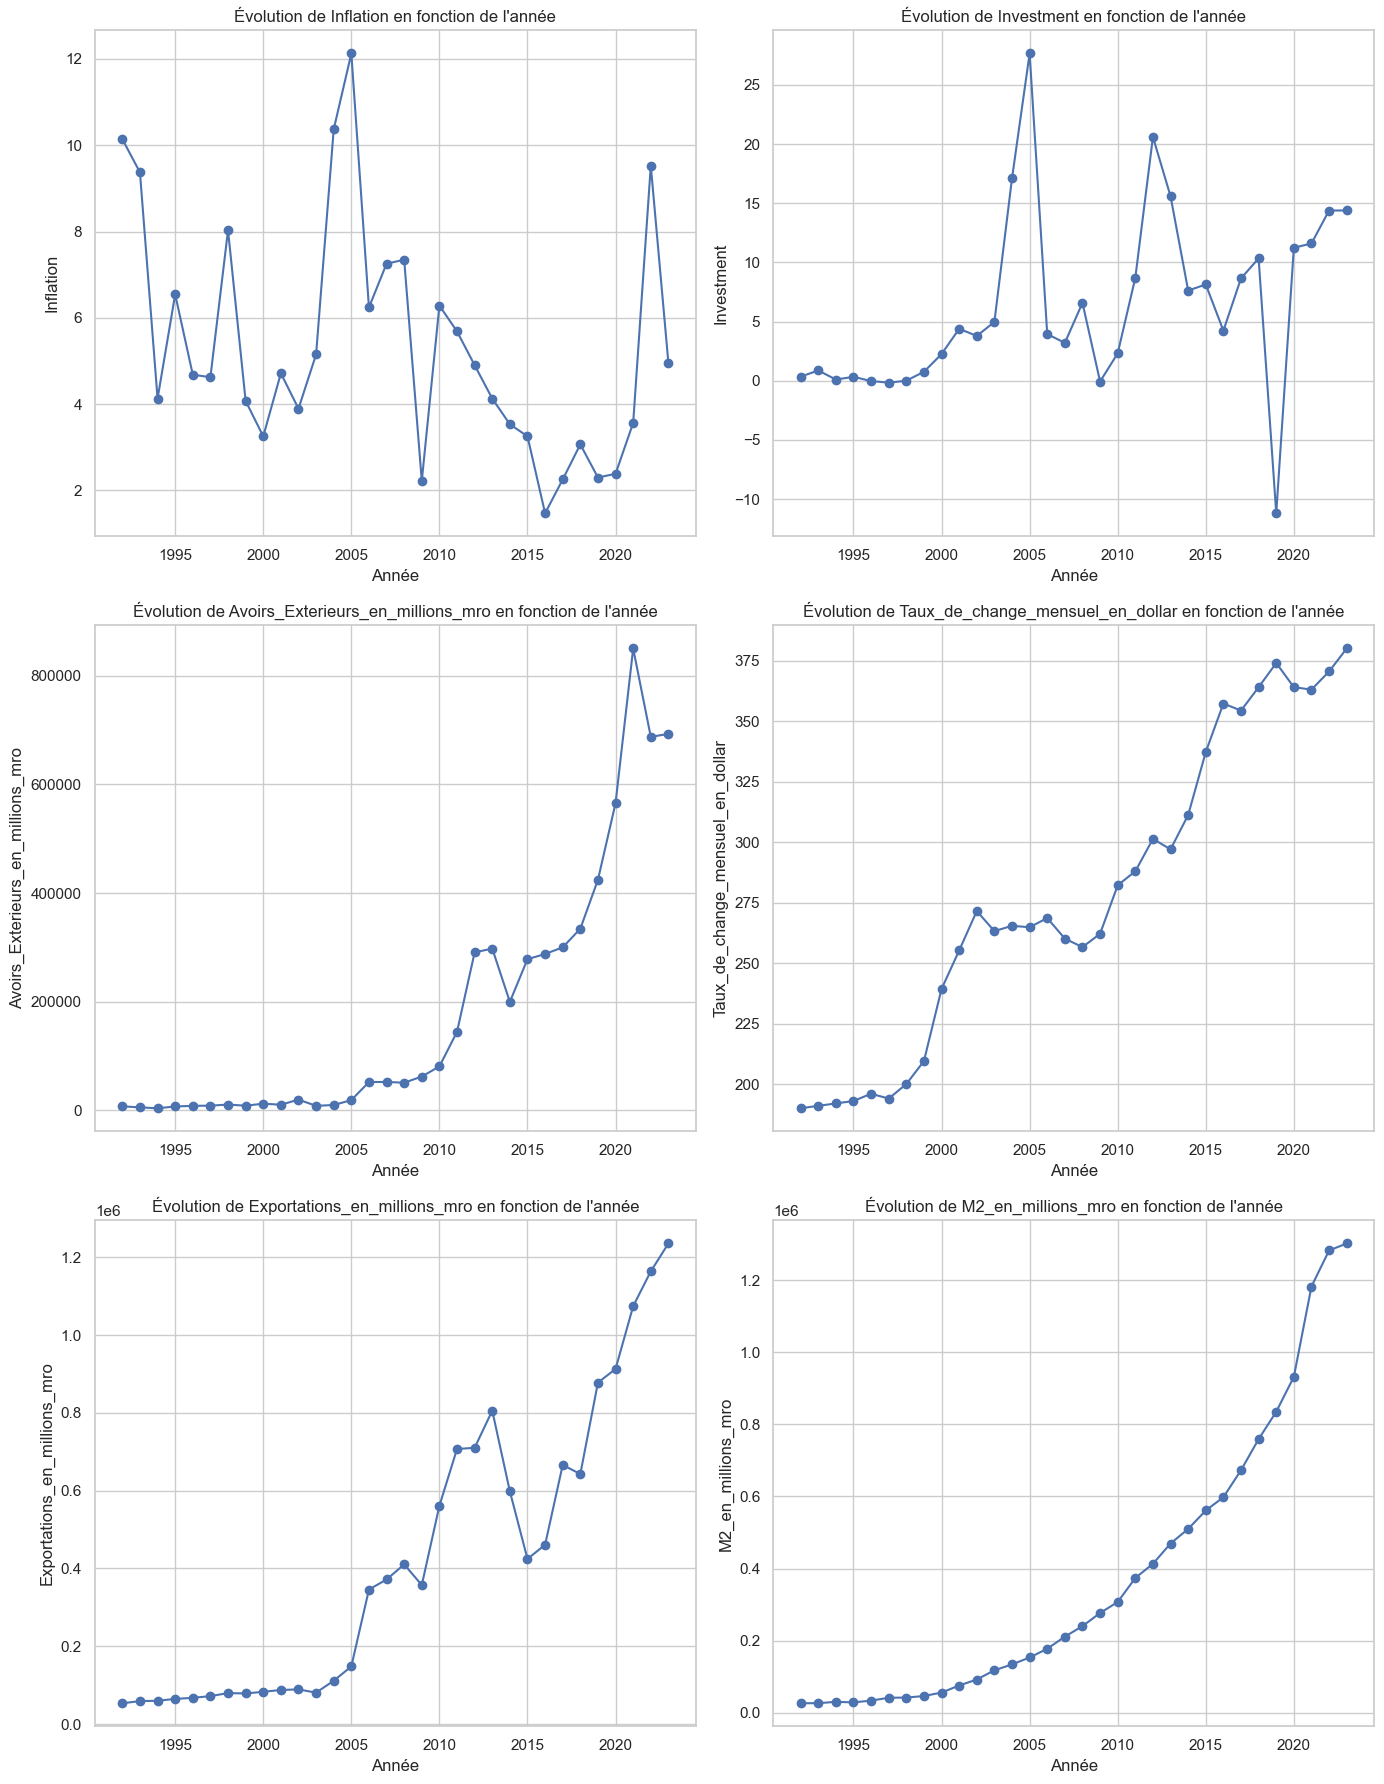

In [44]:
import matplotlib.pyplot as plt

# Variables à tracer
variables = ['Inflation', 'Investment', 'Avoirs_Exterieurs_en_millions_mro',
             'Taux_de_change_mensuel_en_dollar', 'Exportations_en_millions_mro', 'M2_en_millions_mro']

# Définition de la taille de la figure et du nombre de sous-graphiques
plt.figure(figsize=(14, 18))

for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)
    plt.plot(df['Year'], df[var], marker='o', linestyle='-', color='b')
    plt.title(f'Évolution de {var} en fonction de l\'année')
    plt.xlabel('Année')
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()


Les histogrammes nous permettent de comprendre la distribution de chaque variable. Nous pourrons identifier si les distributions sont normales, asymétriques, etc.

# Boxplots pour détecter les valeurs aberrantes

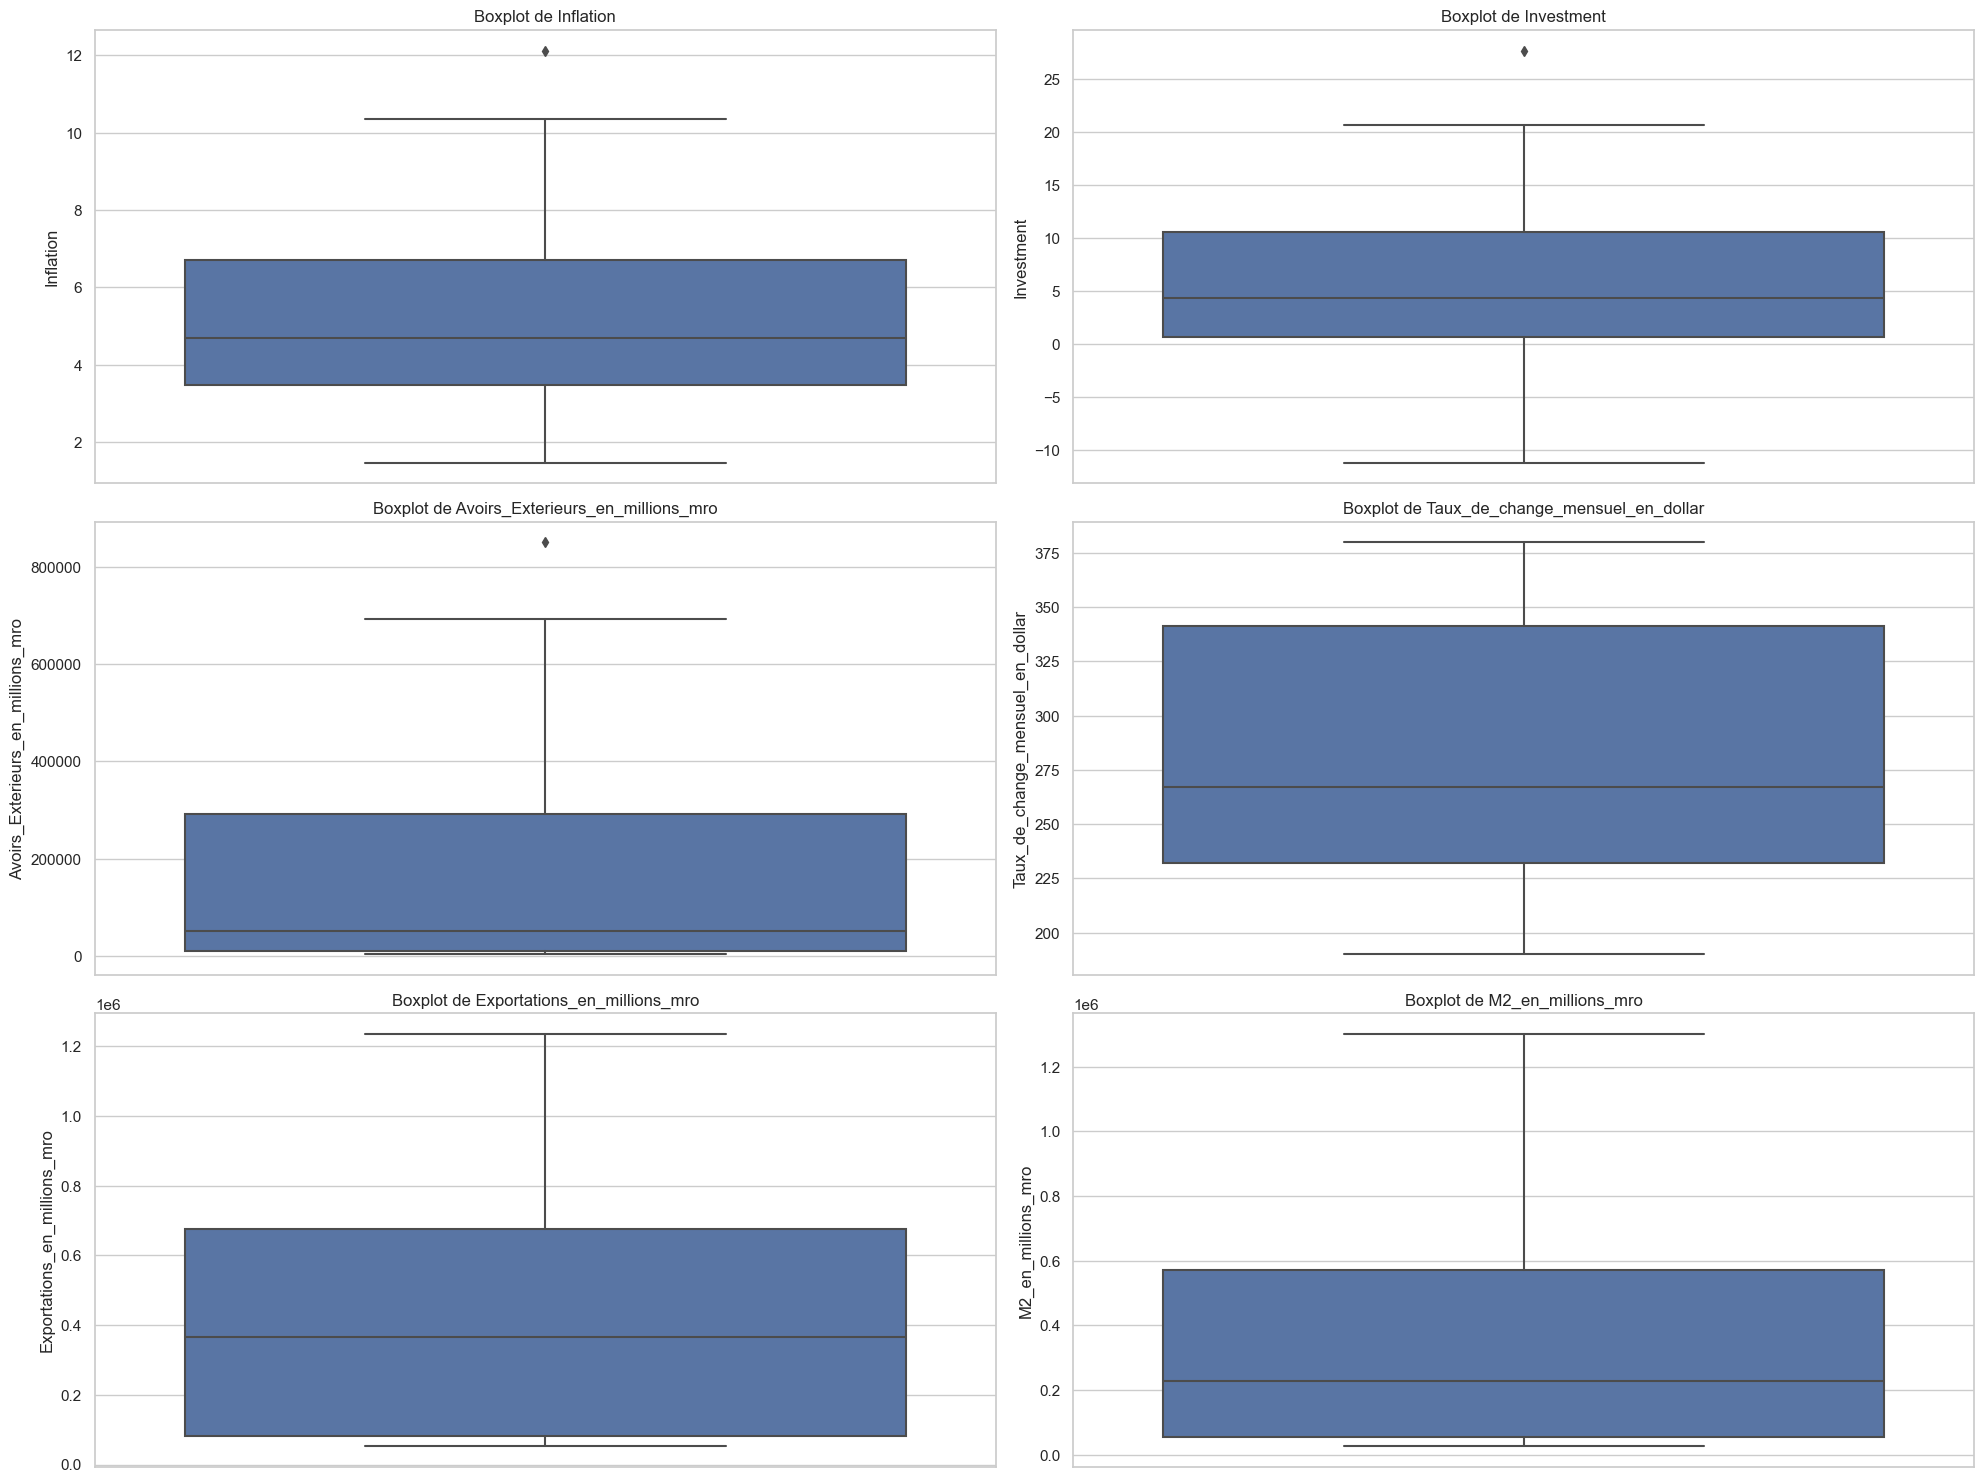

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables à tracer
variables = ['Inflation', 'Investment', 'Avoirs_Exterieurs_en_millions_mro',
             'Taux_de_change_mensuel_en_dollar', 'Exportations_en_millions_mro', 'M2_en_millions_mro']

# Boxplots pour chaque colonne numérique
plt.figure(figsize=(20, 15))

for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var}')
    
plt.tight_layout()
plt.show()


 Les boxplots présentés montrent la distribution de plusieurs indicateurs économiques clés,
 notamment l’inflation, l’investissement, les avoirs extérieurs, le taux de change, les exportations
 et Masse Monétaire (M2). On observe que la plupart des variables ont des distributions
 relativement équilibrées, sans outliers marqués, sauf pour l’inflation, l’investissement, et les
 avoirs extérieurs, qui présentent chacun un outlier suggérant des anomalies ou des événements
 exceptionnels ayant affecté ces indicateurs. La médiane de chaque variable, représentée par
 la ligne au milieu des boîtes, indique les tendances centrales, avec une certaine variabilité,
 particulièrement marquée dans le taux de change et les avoirs extérieurs, ce qui pourrait
 refléter des chocs économiques ou des politiques spécifiques ayant influencé ces domaines.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Renommer les colonnes pour les rendre plus lisibles (facultatif)
df.columns = ['Year', 'Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 
              'Australie', 'Canada', 'Chine', 'Espagne', 'France', 
              'Italie', 'Japon', 'Mauritanie', 'Exportations', 'M2']

# Set style for seaborn
sns.set(style="whitegrid")

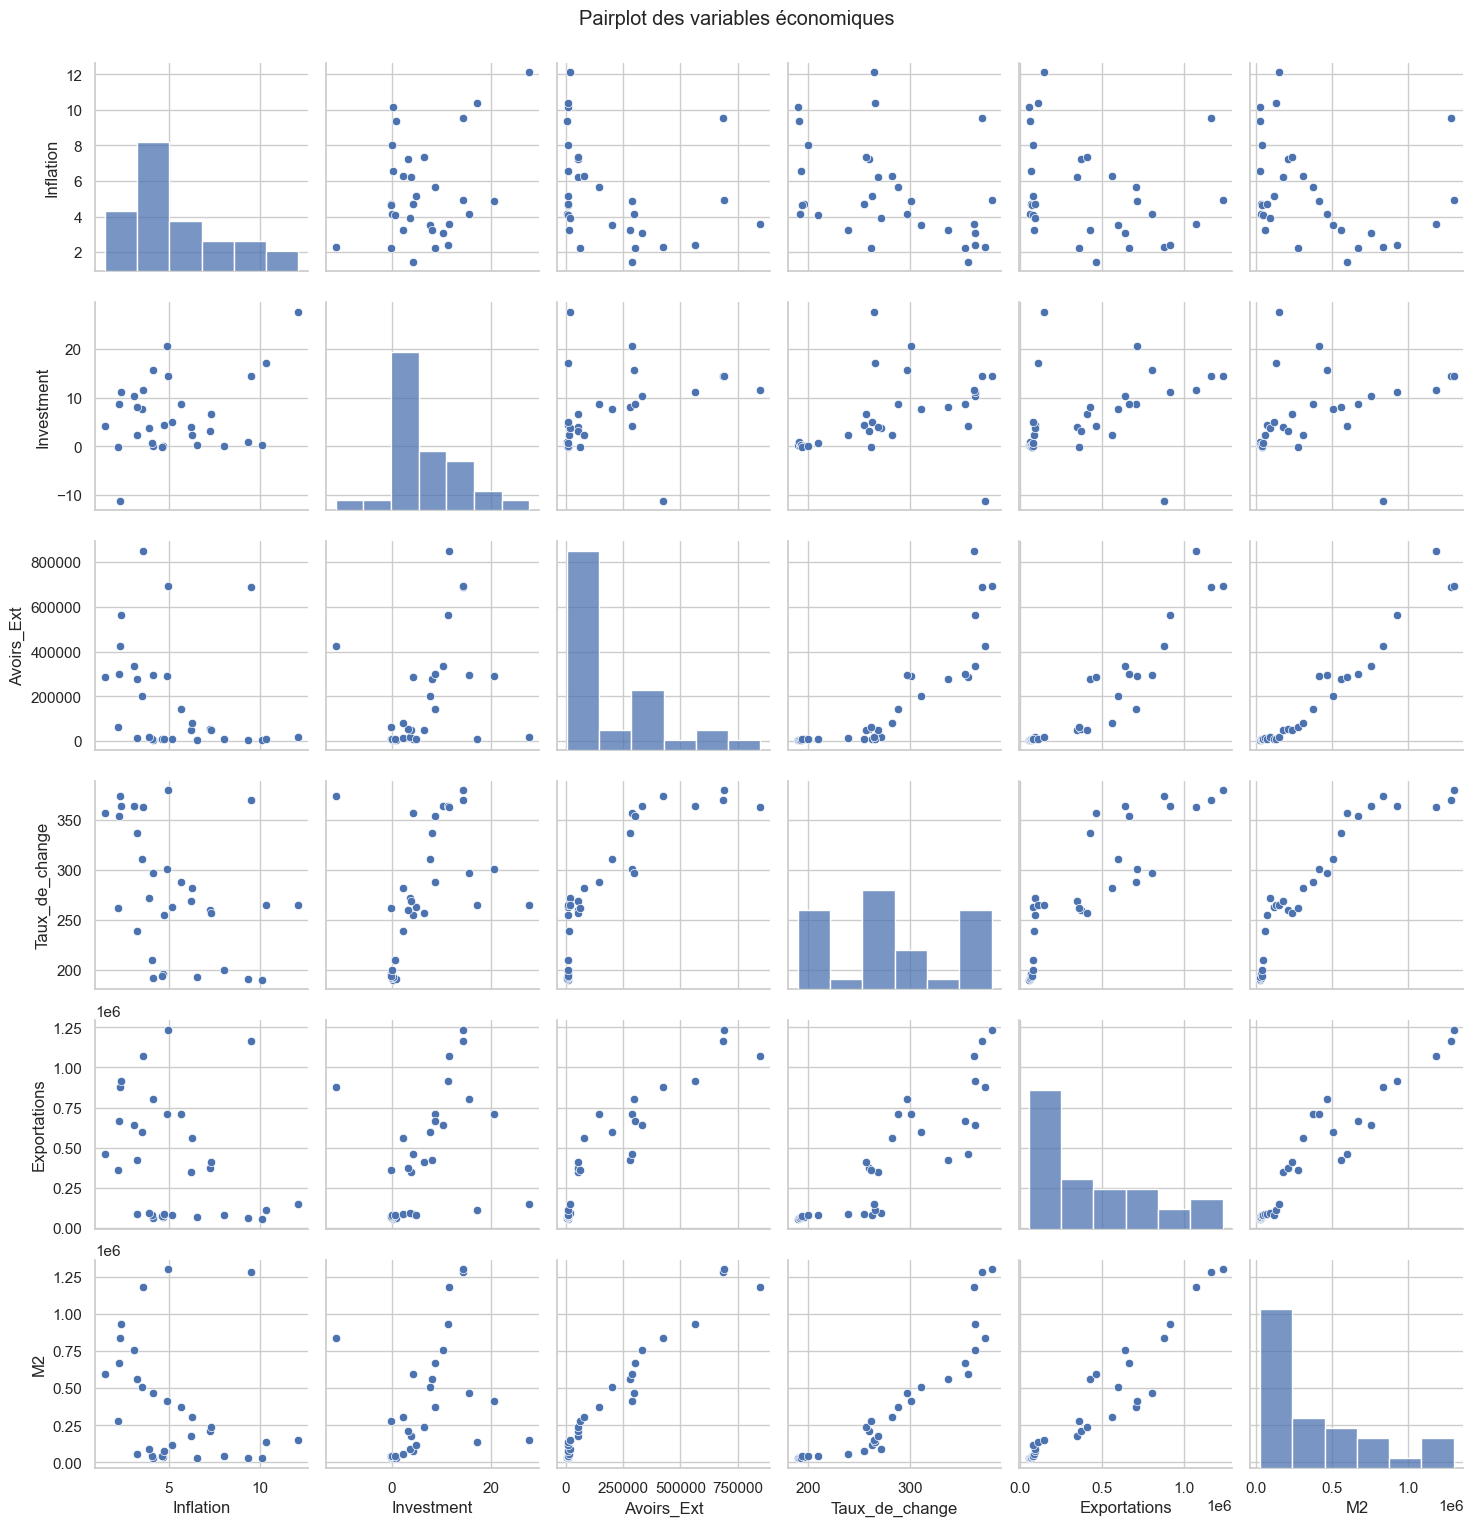

In [28]:
## 1. Pairplot (scatterplot matrix)
sns.pairplot(df[['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']])
plt.suptitle('Pairplot des variables économiques', y=1.02)
plt.show()


Ce graphe permet d’explorer les relations bivariées entre les variables économiques, telles
 que l’inflation, l’investissement, les avoirs extérieurs, le taux de change, les exportations
 et la masse monétaire M2. Chaque graphique de dispersion montre la relation entre deux
 variables, tandis que les histogrammes en diagonale illustrent la distribution de chaque variable
 individuellement. Les relations observées entre certaines variables, comme le lien apparent
 entre l’inflation et le taux de change, ainsi que la corrélation entre les exportations et les
 avoirs extérieurs, suggèrent des dynamiques économiques importantes.

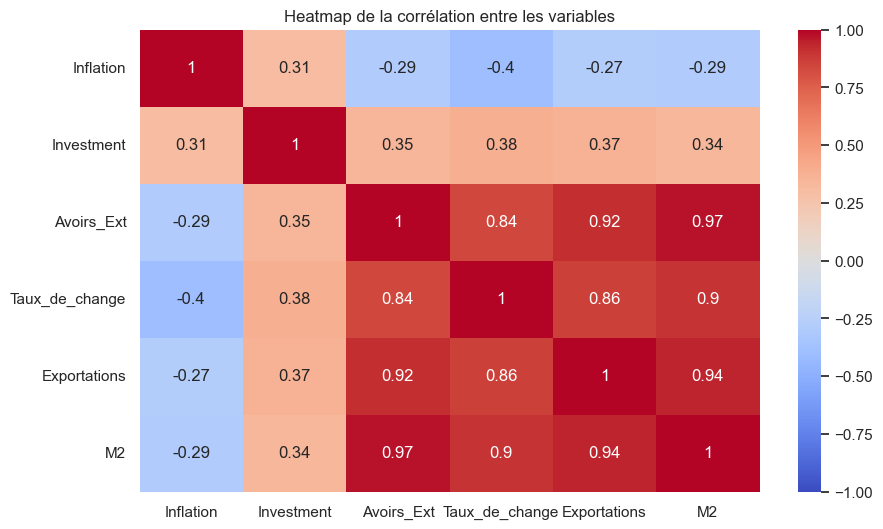

In [48]:
## 2. Heatmap (correlation matrix)
plt.figure(figsize=(10, 6))
corr = df[['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de la corrélation entre les variables')
plt.show()

Ce graphique présente les coefficients de corrélation entre différentes variables économiques
 clés. Les valeurs varient entre-1 et 1, où une valeur proche de 1 indique une corrélation
 positive forte, et une valeur proche de-1 indique une corrélation négative forte. On observe,
 par exemple, une forte corrélation positive entre les avoirs extérieurs (Avoirs_Ext) et la
 masse monétaire (M2), ainsi qu’entre les exportations et les avoirs extérieurs, suggérant que
 l’augmentation des exportations pourrait être un facteur déterminant dans l’accumulation des
 réserves extérieures. En revanche, l’inflation présente une corrélation négative avec plusieurs
 variables, notamment le taux de change et les avoirs extérieurs, ce qui pourrait indiquer que
 des périodes d’inflation élevée sont associées à des dépréciations monétaires et à une réduction
 des réserves extérieures

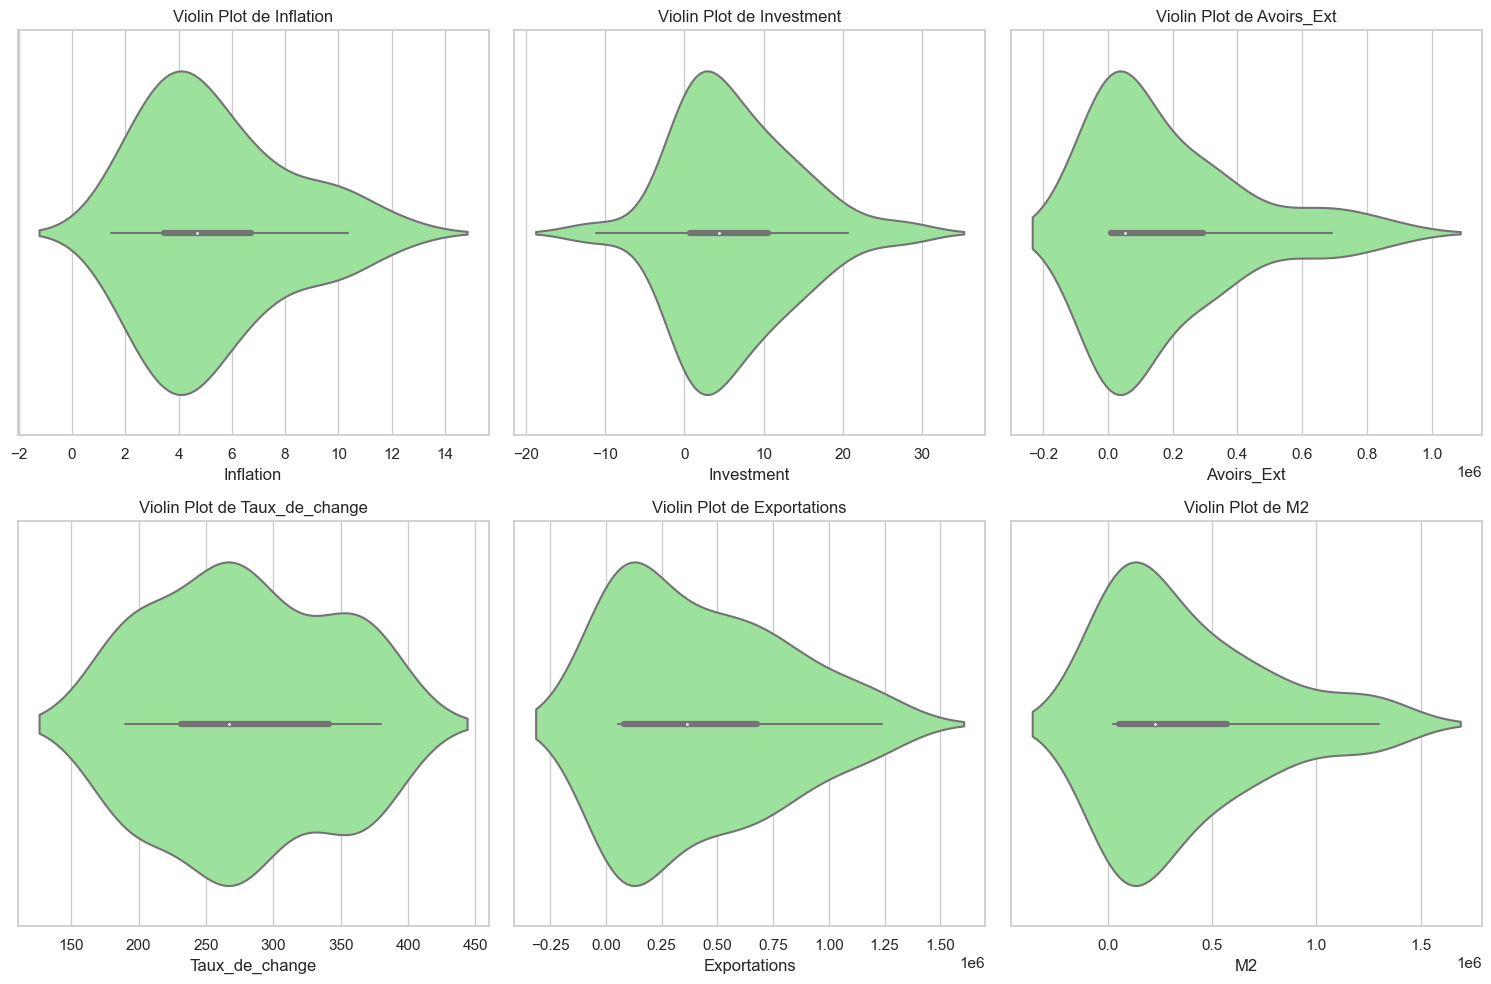

In [49]:
## 3. Violin Plot (distribution avec indication de la densité)
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2'], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x=column, color='lightgreen')
    plt.title(f'Violin Plot de {column}')
plt.tight_layout()
plt.show()

Chaque graphique représente la distribution d’une variable économique, en montrant à la
 fois la densité des données et la distribution statistique sous forme de boîte à moustaches
 intégrée. Par exemple, le Violin Plot de l’inflation montre une distribution asymétrique avec
 une majorité des observations autour de 4%, tandis que les distributions des investissements
 et des avoirs extérieurs montrent une concentration des données autour de valeurs spécifiques,
 avec une distribution plus dispersée pour les investissements. Le taux de change et les
 exportations montrent également une large variation, reflétant des changements significatifs
 dans ces indicateurs au fil des ans

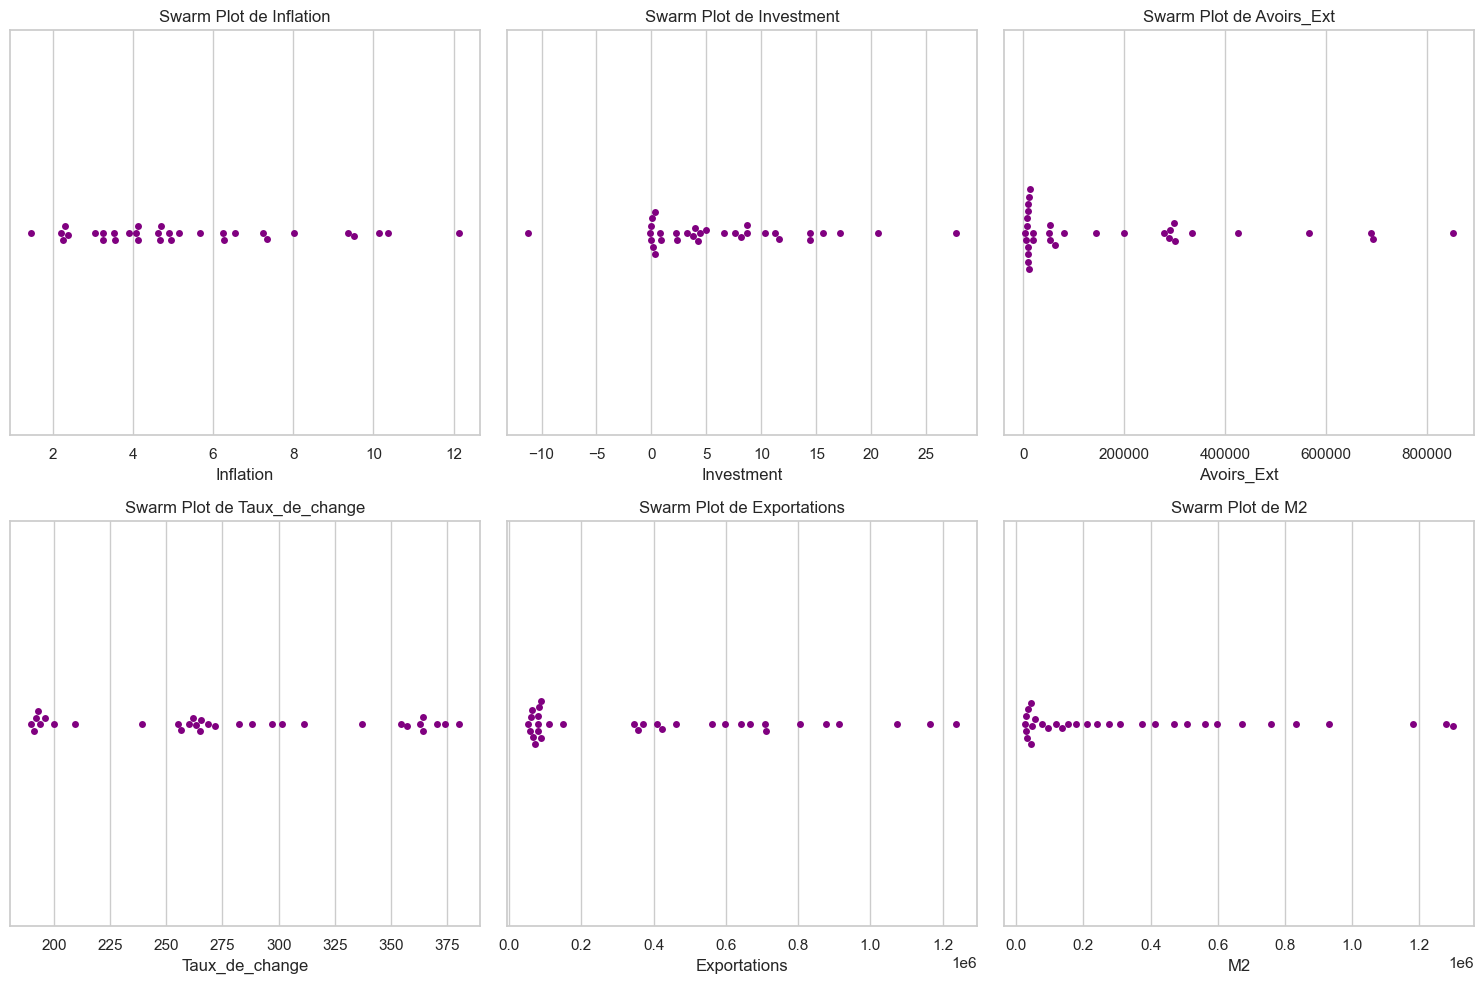

In [50]:
## 4. Swarm Plot (dispersion des données avec distribution)
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2'], 1):
    plt.subplot(2, 3, i)
    sns.swarmplot(data=df, x=column, color='purple')
    plt.title(f'Swarm Plot de {column}')
plt.tight_layout()
plt.show()

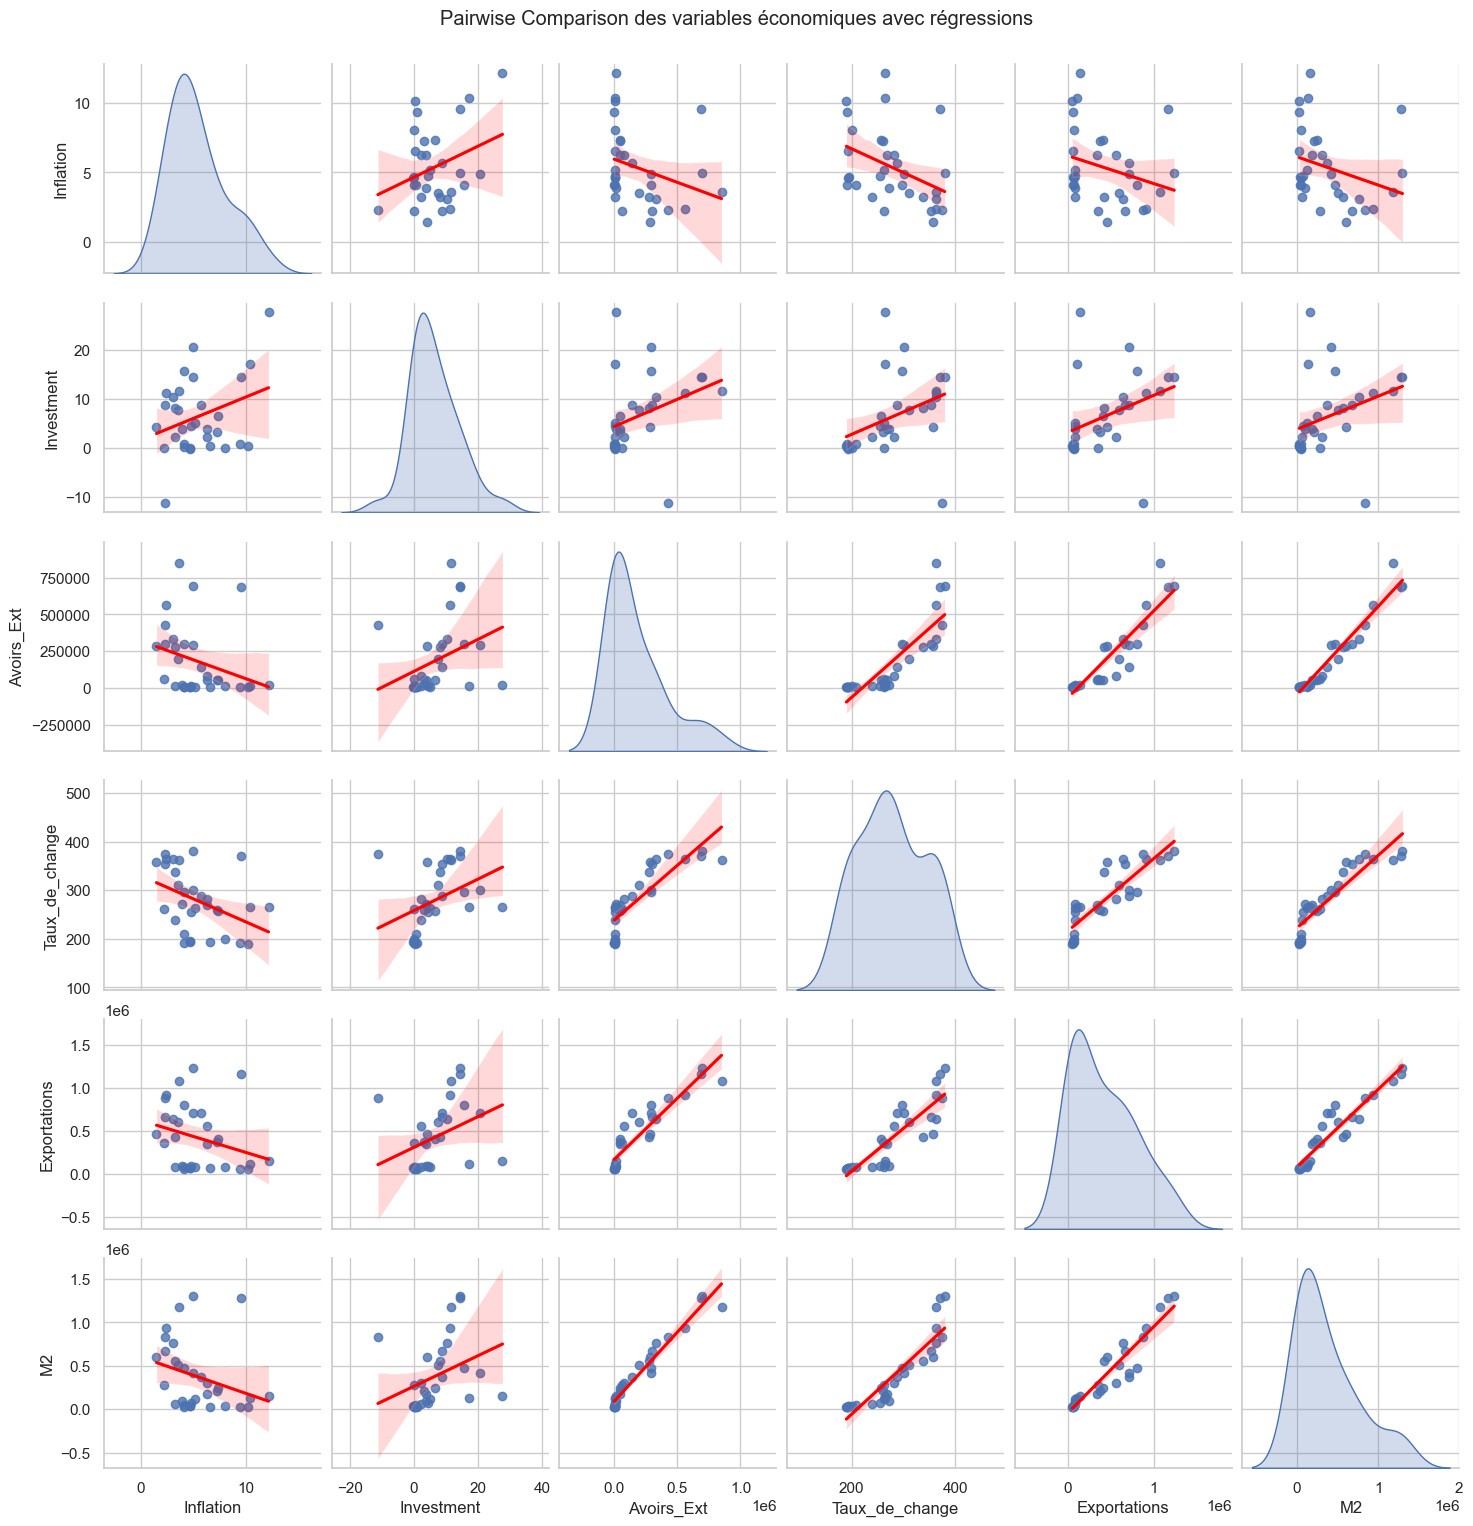

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 5 - Pairwise Sélection des 6 variables spécifiques
selected_columns = ['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']

# Pairplot avec régressions pour les variables sélectionnées
sns.pairplot(df[selected_columns], kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairwise Comparison des variables économiques avec régressions', y=1.02)
plt.show()

Commeillustré dans la Figure 3.7, il existe une forte corrélation positive entre les investissements
 et les exportations, ce qui suggère qu’à mesure que les investissements augmentent, les
 exportations augmentent également. En revanche, il y a une corrélation négative entre
 l’inflation et le taux de change, indiquant que lorsque l’inflation augmente, le taux de change
 tend à se déprécier.

# Analyse univariée
## Statistiques descriptives 

In [52]:
import pandas as pd

# Calculer les statistiques descriptives de base
desc_stats = df[['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']].describe()

# Ajouter la médiane
desc_stats.loc['median'] = df[['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']].median()

# Ajouter le coefficient de variation (CV)
desc_stats.loc['cv'] = desc_stats.loc['std'] / desc_stats.loc['mean']

# Afficher les statistiques descriptives enrichies
desc_stats


,Inflation,Investment,Avoirs_Ext,Taux_de_change,Exportations,M2
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,5.358823,6.334406,181072.812500,278.630313,4.207030e+05,3.755487e+05
std,2.706786,7.577821,237148.133651,63.788512,3.685067e+05,3.880637e+05
min,1.471710,-11.191734,3943.000000,190.000000,5.336986e+04,2.690400e+04
25%,3.464458,0.658203,9657.750000,231.850000,8.035849e+04,5.417500e+04
50%,4.698101,4.315025,52312.000000,267.000000,3.645625e+05,2.260955e+05
75%,6.721370,10.564465,292545.750000,341.497500,6.765195e+05,5.704070e+05
max,12.125649,27.652036,850260.000000,380.000000,1.235880e+06,1.301300e+06
median,4.698101,4.315025,52312.000000,267.000000,3.645625e+05,2.260955e+05
cv,0.505108,1.196295,1.309684,0.228936,8.759308e-01,1.033324e+00


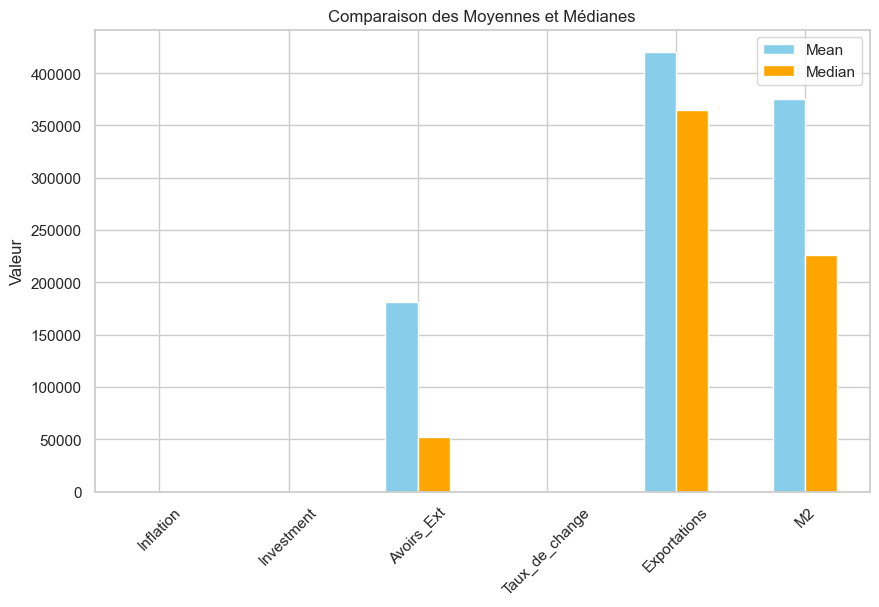

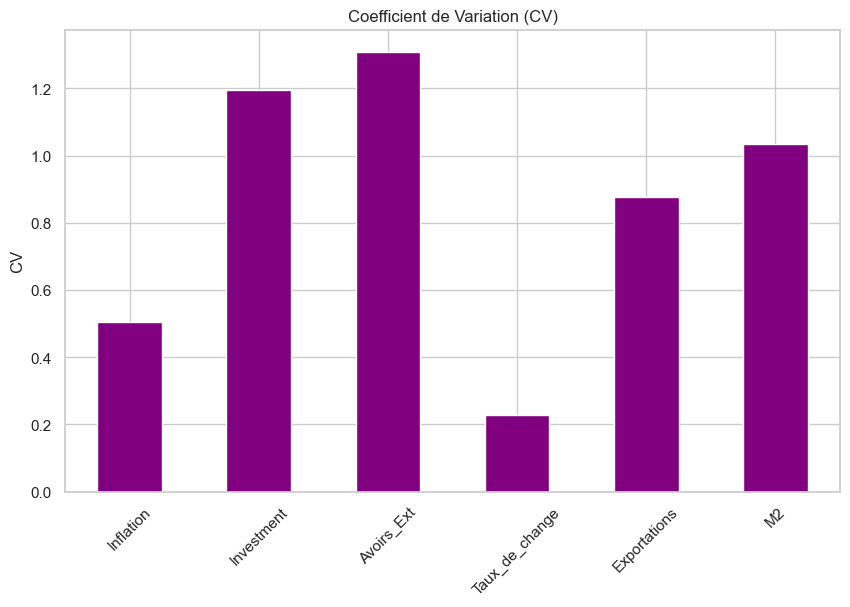

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot pour les moyennes et médianes
mean_median_df = pd.DataFrame({
    'Mean': desc_stats.loc['mean'],
    'Median': desc_stats.loc['median']
})

mean_median_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Comparaison des Moyennes et Médianes')
plt.ylabel('Valeur')
plt.xticks(rotation=45)
plt.show()

# Barplot pour le coefficient de variation (CV)
cv_df = desc_stats.loc['cv']

cv_df.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Coefficient de Variation (CV)')
plt.ylabel('CV')
plt.xticks(rotation=45)
plt.show()


 La Figure 3.8 présente le coefficient de variation pour six indicateurs économiques. La
 variable "Avoirs_Ext" affiche le plus haut niveau de variabilité, ce qui suggère que les
 avoirs extérieurs sont sujets à des fluctuations significatives. En revanche, "Inflation" et
 "Taux_de_change" montrent des valeurs de CV relativement plus faibles, indiquant des
 tendances plus stables. Ces résultats suggèrent que les décideurs politiques pourraient devoir
 prêter une attention particulière à la volatilité des avoirs extérieurs lors de la conception des
 politiques économiques.

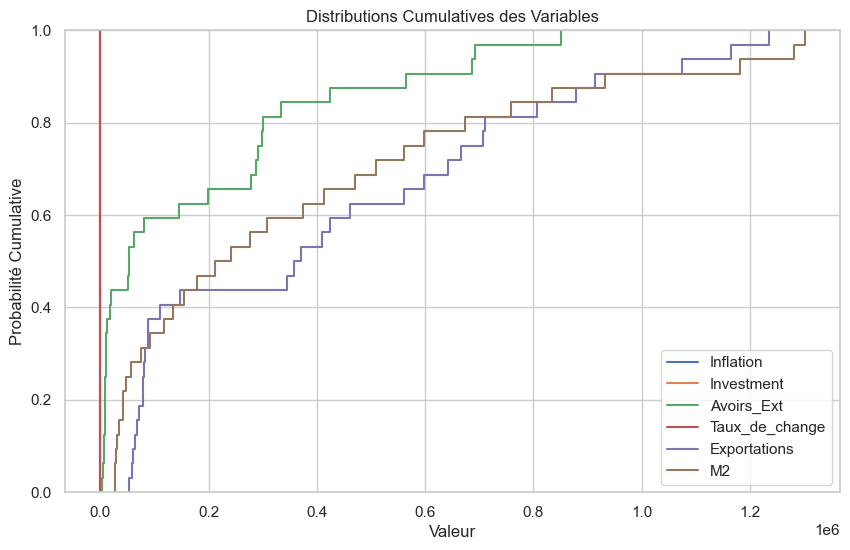

In [38]:
import numpy as np

plt.figure(figsize=(10, 6))

for column in ['Inflation', 'Investment', 'Avoirs_Ext', 'Taux_de_change', 'Exportations', 'M2']:
    sns.ecdfplot(df[column], label=column)

plt.title('Distributions Cumulatives des Variables')
plt.xlabel('Valeur')
plt.ylabel('Probabilité Cumulative')
plt.legend()
plt.show()


La Figure 3.9 présente les fonctions de distribution cumulative pour six indicateurs économiques.
 Les CDF révèlent que [insérer des observations spécifiques basées sur le graphique, par
 exemple : "Les investissements présentent une distribution plus asymétrique vers la droite par
 rapport à l’inflation, suggérant la présence de quelques valeurs d’investissement très élevées"].
 Cela indique que [insérer l’interprétation économique]. Par exemple, une pente plus raide
 dans la CDF des "Exportations" pourrait indiquer une concentration plus élevée des valeurs
 d’exportation dans une plage particulière, ce qui pourrait être influencé par des facteurs tels
 que les accords commerciaux ou les chocs spécifiques à une industrie

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your data
df = pd.read_excel("C:/Users/hp/Desktop/PFA_BCM/dataframe.xlsx")

# Convert 'Year' to datetime index
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace=True)

In [60]:
model = ARIMA(train_data['Avoirs_Exterieurs_en_millions_mro'], order=(1, 1, 1))

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Train-test split (assuming monthly data)
train_data = df['Avoirs_Exterieurs_en_millions_mro'][:-12]
test_data = df['Avoirs_Exterieurs_en_millions_mro'][-12:]

# ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Predictions
forecast = model_fit.forecast(steps=12)

# Evaluation
mse = mean_squared_error(test_data, forecast)
print('MSE:', mse)

MSE: 11492542583.906837


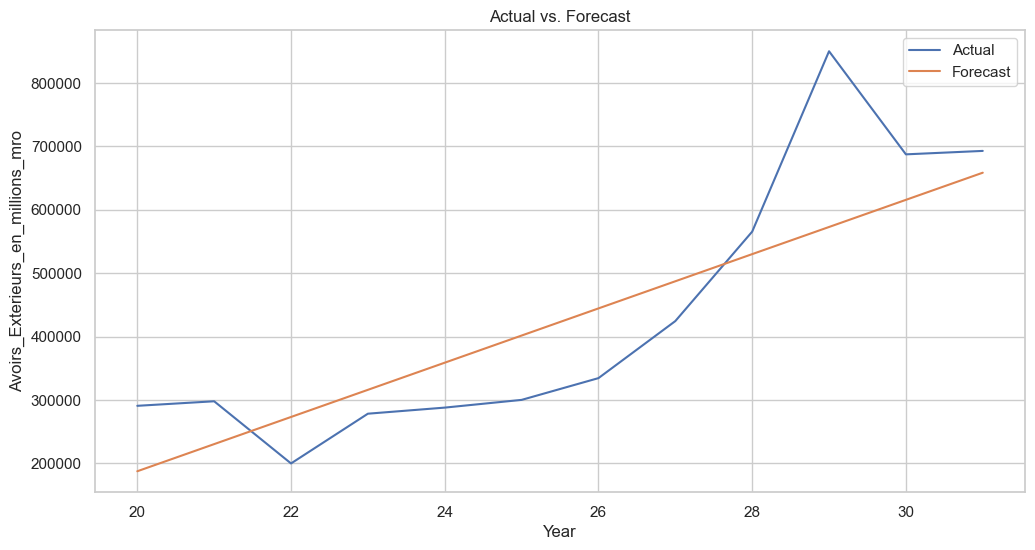

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('Actual vs. Forecast')
plt.xlabel('Year')
plt.ylabel('Avoirs_Exterieurs_en_millions_mro')
plt.show()